In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing Data

In [2]:
bigMart_df = pd.read_csv("data/proj6/Train.csv")
bigMart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Inspecting Data

In [3]:
bigMart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
bigMart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
bigMart_df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.016047,0.019278,0.01676,0.0,0.0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.8092,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [6]:
bigMart_df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [7]:
bigMart_df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
bigMart_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
bigMart_df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Data Cleaning

In [10]:
bigMart_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
bigMart_df["Item_Weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype  
--------------  -----  
7060 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [12]:
bigMart_df["Outlet_Size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Outlet_Size
Non-Null Count  Dtype 
--------------  ----- 
6113 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


In [13]:
bigMart_df["Outlet_Size"][:10]

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

In [14]:
bigMart_df["Item_Weight"] = bigMart_df["Item_Weight"].fillna(bigMart_df["Item_Weight"].mean())

In [15]:
bigMart_df["Item_Weight"].isna().sum()

0

In [16]:
bigMart_df["Outlet_Size"].mode()[0]

'Medium'

In [17]:
bigMart_df["Outlet_Size"] = bigMart_df["Outlet_Size"].fillna(bigMart_df["Outlet_Size"].mode()[0])

In [18]:
bigMart_df["Item_Fat_Content"].replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace=True)

In [19]:
bigMart_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
bigMart_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Visualizing Data

In [21]:
import seaborn as sns

/home/djoe/Documents/myprogramming/hackpython/dataScience/udemy_proj/env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

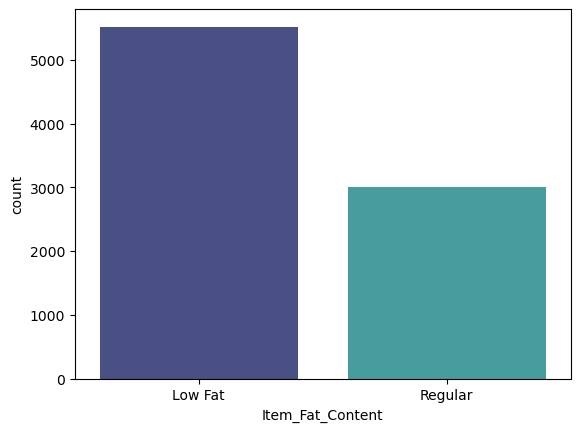

In [28]:
sns.countplot(data=bigMart_df, x="Item_Fat_Content", palette="mako")

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

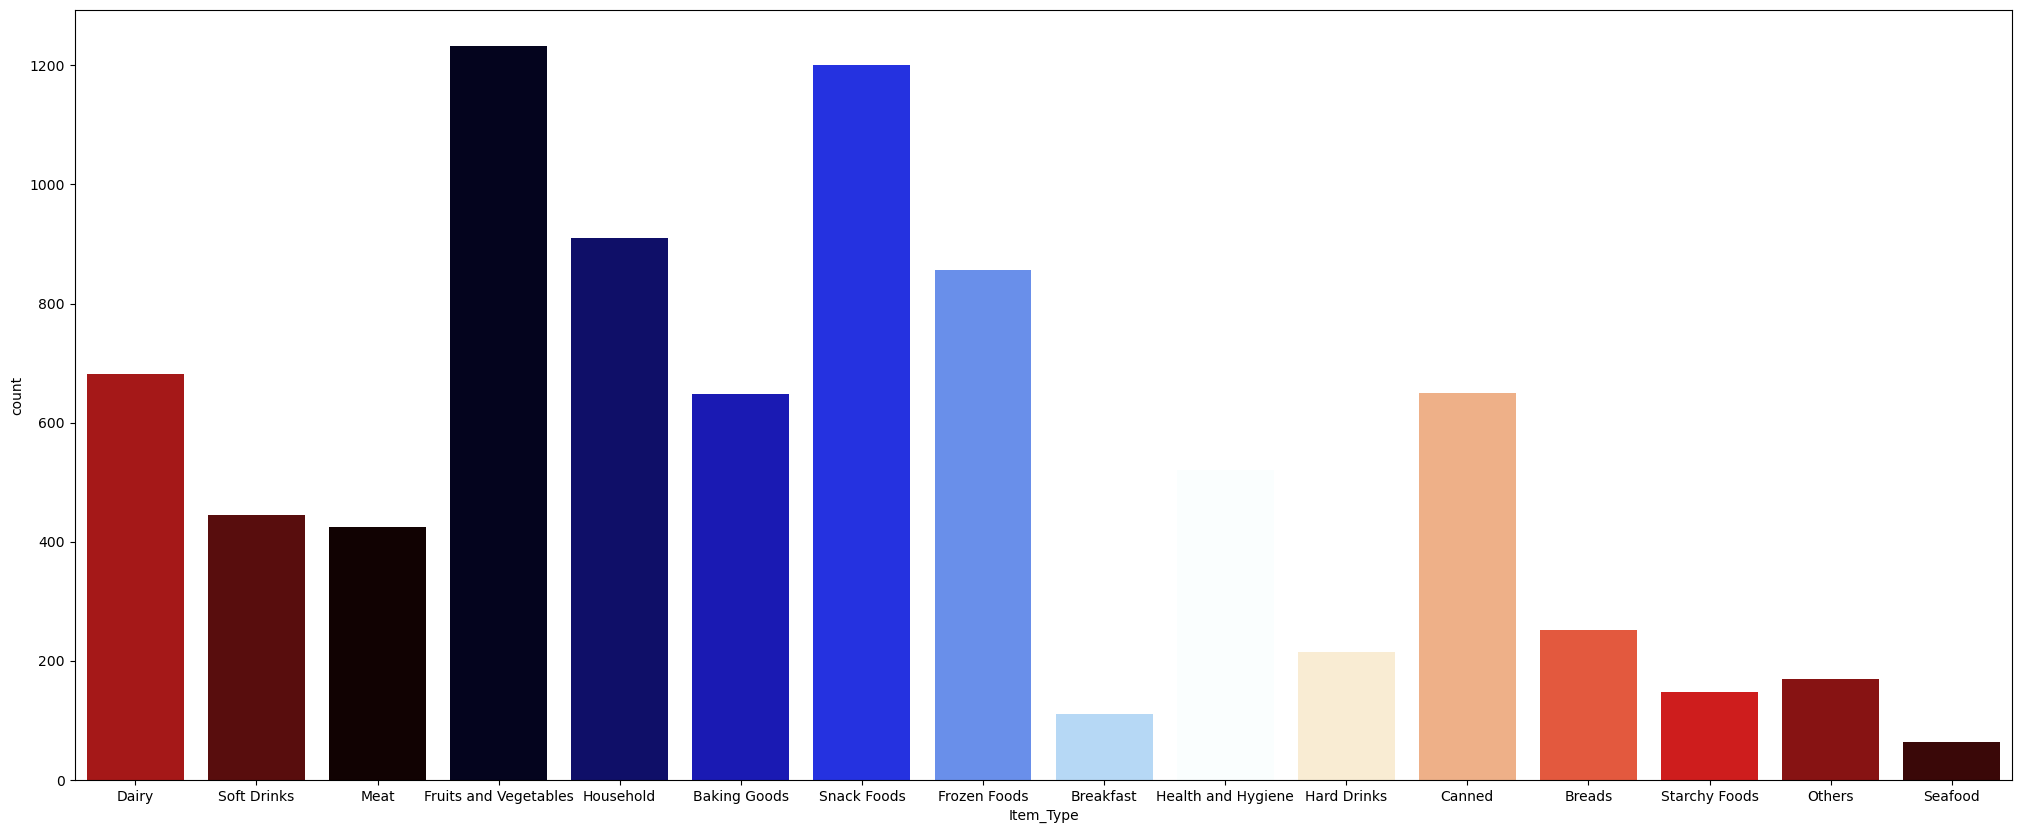

In [31]:
plt.figure(figsize=(25, 10))
sns.countplot(data=bigMart_df, x="Item_Type", palette="flag")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

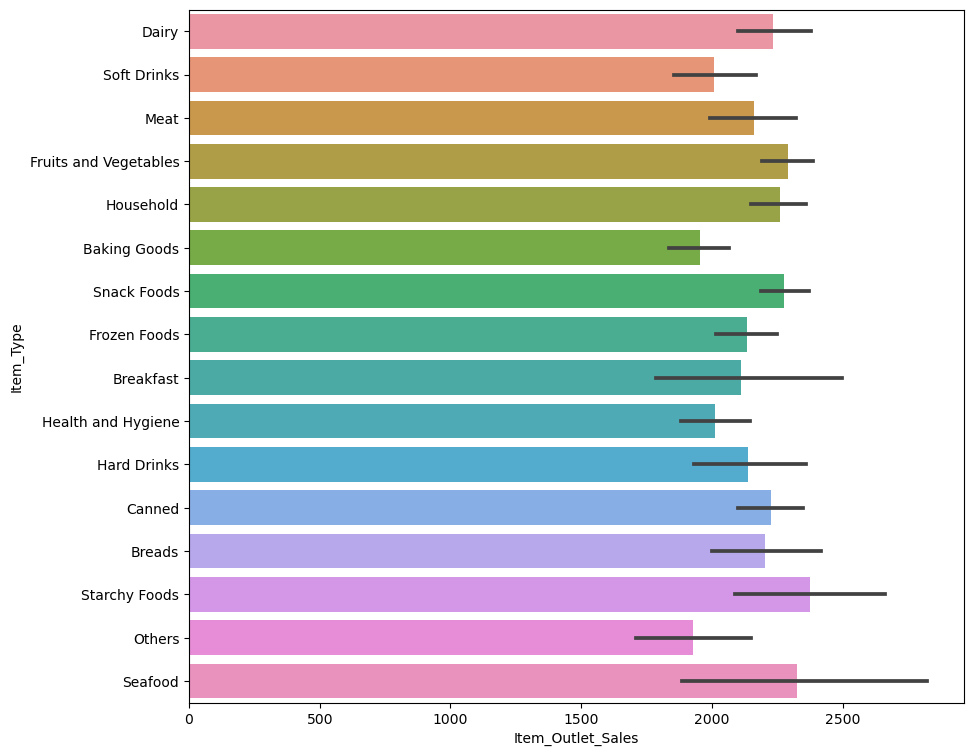

In [34]:
plt.figure(figsize=(10, 9))
sns.barplot(data=bigMart_df, y="Item_Type", x="Item_Outlet_Sales")

## Converting Categorical Values

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [44]:
for stuff in bigMart_df.keys():
    if types.is_object_dtype(bigMart_df[stuff]) == True:
        bigMart_df[stuff] = le.fit_transform(bigMart_df[stuff])

In [46]:
bigMart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [54]:
bigMart_df_test = pd.read_csv("data/proj6/Test.csv")
bigMart_df_test["Item_Weight"] = bigMart_df_test["Item_Weight"].fillna(bigMart_df_test["Item_Weight"].mean())
bigMart_df_test["Outlet_Size"] = bigMart_df_test["Outlet_Size"].fillna(bigMart_df_test["Outlet_Size"].mode()[0])
bigMart_df_test["Item_Fat_Content"].replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace=True)

In [56]:
bigMart_df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [57]:
for stuff in bigMart_df_test.keys():
    if types.is_object_dtype(bigMart_df_test[stuff]) == True:
        bigMart_df_test[stuff] = le.fit_transform(bigMart_df_test[stuff])

In [58]:
bigMart_df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [61]:
le.inverse_transform([[2]])

array(['Supermarket Type2'], dtype=object)

## Prediction

In [80]:
from sklearn.ensemble import RandomForestRegressor

X = bigMart_df.drop("Item_Outlet_Sales", axis=1)
y = bigMart_df["Item_Outlet_Sales"]

rfr = RandomForestRegressor()
rfr.fit(X, y)

RandomForestRegressor()

In [84]:
X_test = bigMart_df_test
rfr.predict(X_test)

array([1638.83341 , 1136.766946,  749.504376, ..., 1881.770514,
       4827.28303 , 1491.052442])

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr.fit(X_train, y_train)

rfr.score(X_test, y_test)

0.5587090910507939